<a href="https://colab.research.google.com/github/Vaishnavit2000/tracing_contact_covid/blob/main/Contact_Tracing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
from sklearn.cluster import DBSCAN
df = pd.read_json('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Tracking the covid spread/MOCK_DATA.json')
df.head(10)

,User,TimeStamp,Longitude,Latitude
0,Arthur,2020-08-27 17:33:33,60.077519,13.988041
1,Walter,2020-08-27 20:13:18,60.029391,13.903152
2,Arthur,2020-08-27 18:22:23,60.078368,13.933152
3,Walter,2020-08-27 03:38:36,60.002145,13.967506
4,James,2020-08-27 01:11:35,60.040521,13.966431
5,William,2020-08-27 17:09:51,60.064593,13.961219
6,Arthur,2020-08-27 12:24:07,60.068367,13.940022
7,John,2020-08-27 16:23:20,60.006478,13.998072
8,Arthur,2020-08-27 03:35:48,60.099384,13.911308
9,Arthur,2020-08-27 15:37:54,60.012216,13.908362


Visualize the people on graph using those id's

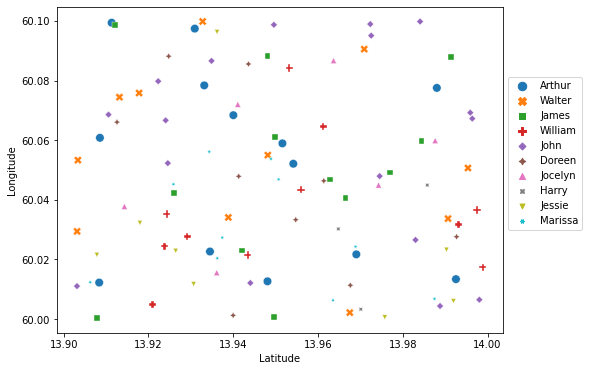

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Latitude', y='Longitude', data=df, hue='User' , style='User',size='User')
plt.legend(bbox_to_anchor= [1, 0.8])
plt.show()

In [ ]:
epsilon = 0.0018288 # a radial distance of 6 feet in kilometers
model = DBSCAN(eps=epsilon, min_samples=2, metric='haversine').fit(df[['Latitude', 'Longitude']])
df['cluster'] = model.labels_.tolist()

In [ ]:
def get_infected_names(input_name):   
    
    input_name_clusters = []
    for i in range(len(df)):
        if df['User'][i] == input_name:
            if df['cluster'][i] in input_name_clusters:
                pass
            else:
                input_name_clusters.append(df['cluster'][i])
    
    infected_names = []
    for cluster in input_name_clusters:
        if cluster != -1:
            ids_in_cluster = df.loc[df['cluster'] == cluster, 'User']
            for i in range(len(ids_in_cluster)):
                member_id = ids_in_cluster.iloc[i]
                if (member_id not in infected_names) and (member_id != input_name):
                    infected_names.append(member_id)
                else:
                    pass
    return infected_names

    

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


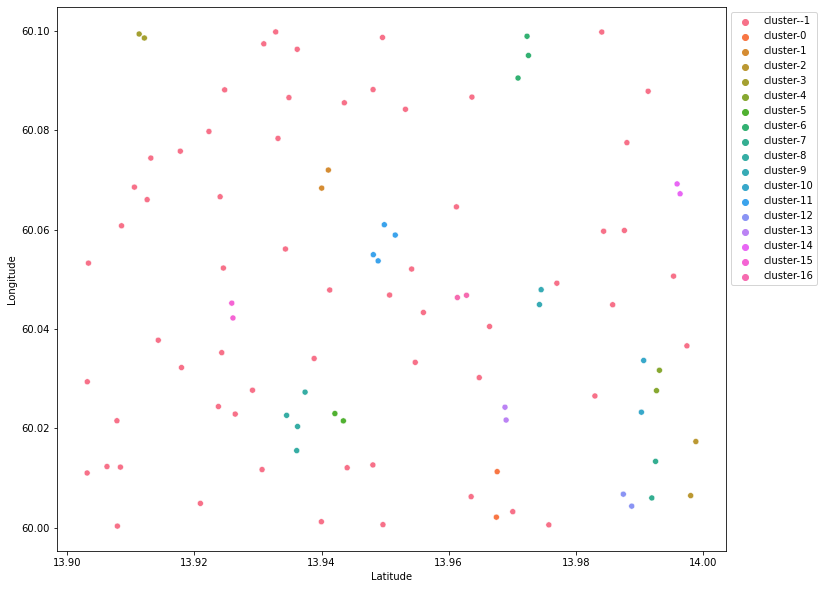

In [ ]:
labels = model.labels_
fig = plt.figure(figsize=(12,10))
sns.scatterplot(df['Latitude'], df['Longitude'], hue = ['cluster-{}'.format(x) for x in labels])
plt.legend(bbox_to_anchor = [1, 1])
plt.show()

In [ ]:
print(get_infected_names('William'))

['James', 'John', 'Doreen']
